1. **Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)**
Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.
---



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
columnas = {'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
1401,Apartamento,Apartamento en venta en San Patricio,3,4,290,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 2.200.000.000,$,2.200.000.000
8147,Casa,Casa en venta en Engativa,4,3,109,Engativa,Engativá,$ 540.000.000,$,540.000.000
490,Apartamento,Apartamento en venta en Usaquén,2,2,71,Usaquén,Usaquén,$ 476.500.000,$,476.500.000


In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Área           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles['Tipo'].value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

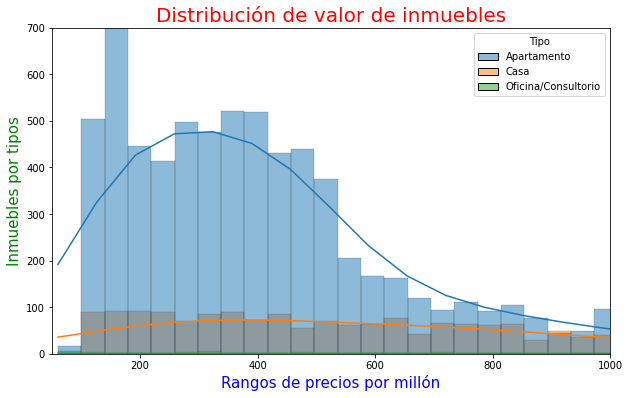

In [ ]:
inmuebles_filtrados = inmuebles.query("Tipo in ['Casa', 'Apartamento', 'Oficina/Consultorio']")
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles_filtrados, x='Precio_Millon', kde=True, hue='Tipo' )
grafica.set_title('Distribución de valor de inmuebles', fontsize=20, color='red')
plt.xlim((50,1000))
plt.ylim((0,700))
plt.xlabel('Rangos de precios por millón', fontsize = 15, color='blue')
plt.ylabel('Inmuebles por tipos', fontsize = 15, color= 'green')
plt.show()

2. **Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.**

---




In [ ]:
inmuebles['Valor_m2'] = inmuebles['Precio_Millon']/inmuebles['Area']
valor_m2_barrio = inmuebles.groupby('Barrio')['Valor_m2'].mean().reset_index()
barrios_mas_baratos = valor_m2_barrio.sort_values(by='Valor_m2', ascending=True).head(10)

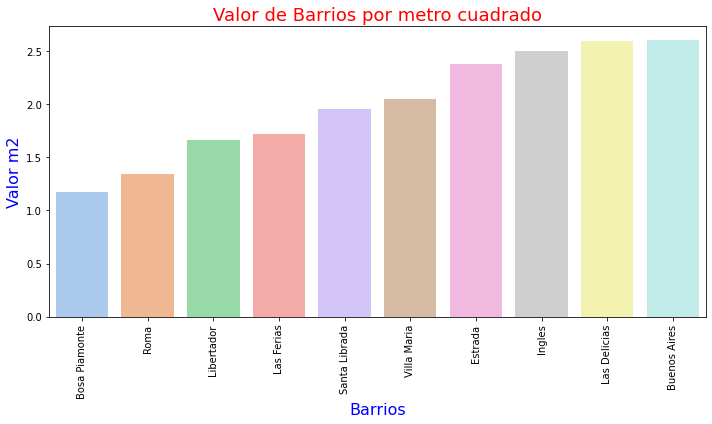

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=barrios_mas_baratos, x='Barrio', y='Valor_m2', palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Barrios', fontsize=16, color='blue')
plt.ylabel('Valor m2', fontsize=16, color='blue')
plt.title('Valor de Barrios por metro cuadrado', fontsize=18, color='red')
plt.tight_layout()
plt.show()